# 11. Matplotlib: data content

Visualization is an essential step for any data analysis. It can both help to design an analysis and to present results. There is a large choice of plotting libraries in Python, all with different strengths and weaknesses. In the frame of this course, we present two of them: Matplotlib and seaborn. We use these two packages because 1) they are very popular and you will necessarily encounter them, 2) they are examples of low- (Matplotlib) and hihgh-level (seaborn) libraries, 3) they represent two different plotting "philosophies" and finally 4) seaborn builds on top of Matplotlib which facilitates the learning.

We start here with Matplotlib which is one of the oldest plotting libraries in Python. Many packages build more user-friendly packages on top of it (like seaborn), making it useful to know as basis. In this chapter and the next, we present only the basics of Matplotlib such as figure creation and basic customization of plot rendering (colors, markers, title etc.) In the next chapters we then we move to seaborn, which we recommend as default plotting library, and also highlight its connection to Matplotlib. Finally we will come back to Matplotlib to show examples of advanced plotting that can be usually be done in an easier way in seaborn but that you might encounter in Matplotlib.

First we load the necessary packages:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cheat sheet

You can find many cheat sheets online. Here's one that is quite complete.

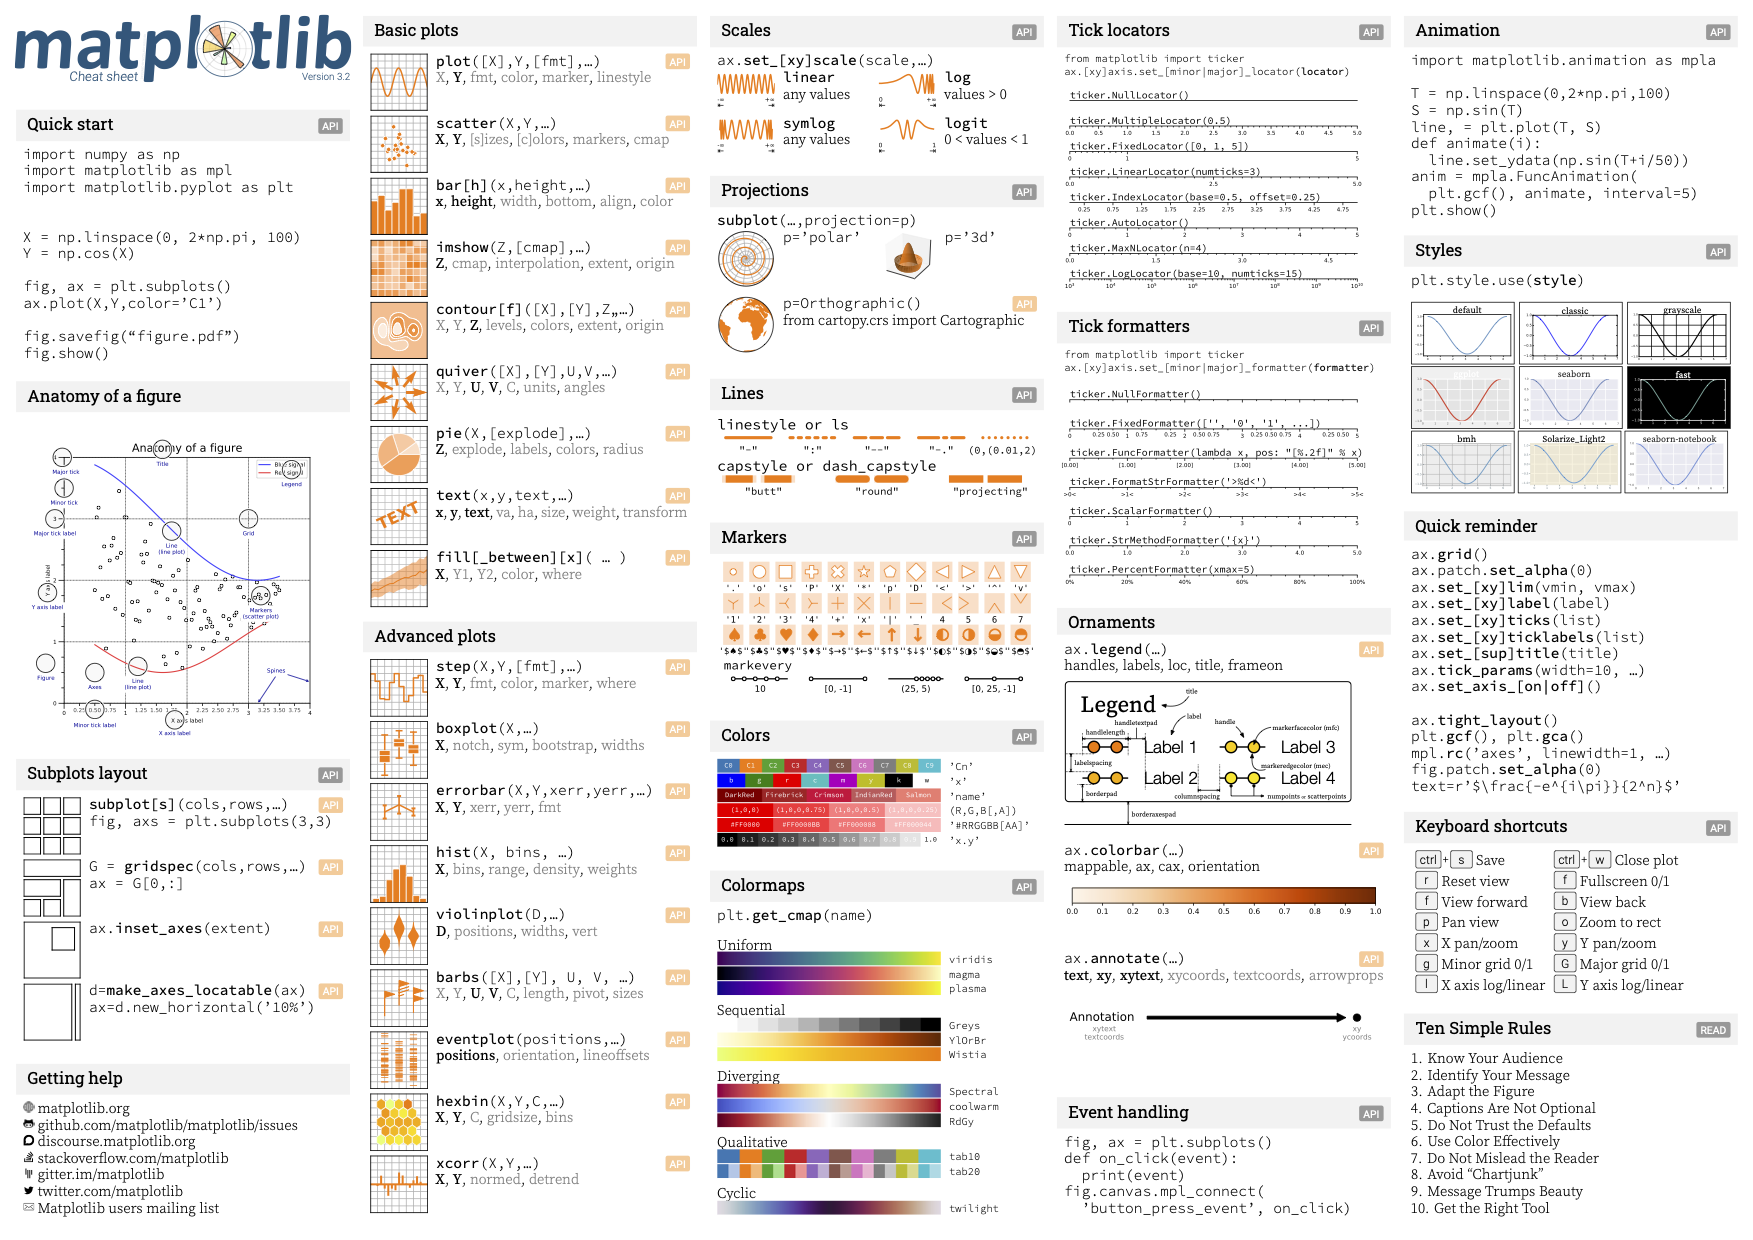

In [8]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/matplotlib/cheatsheets/master/cheatsheets-1.png')

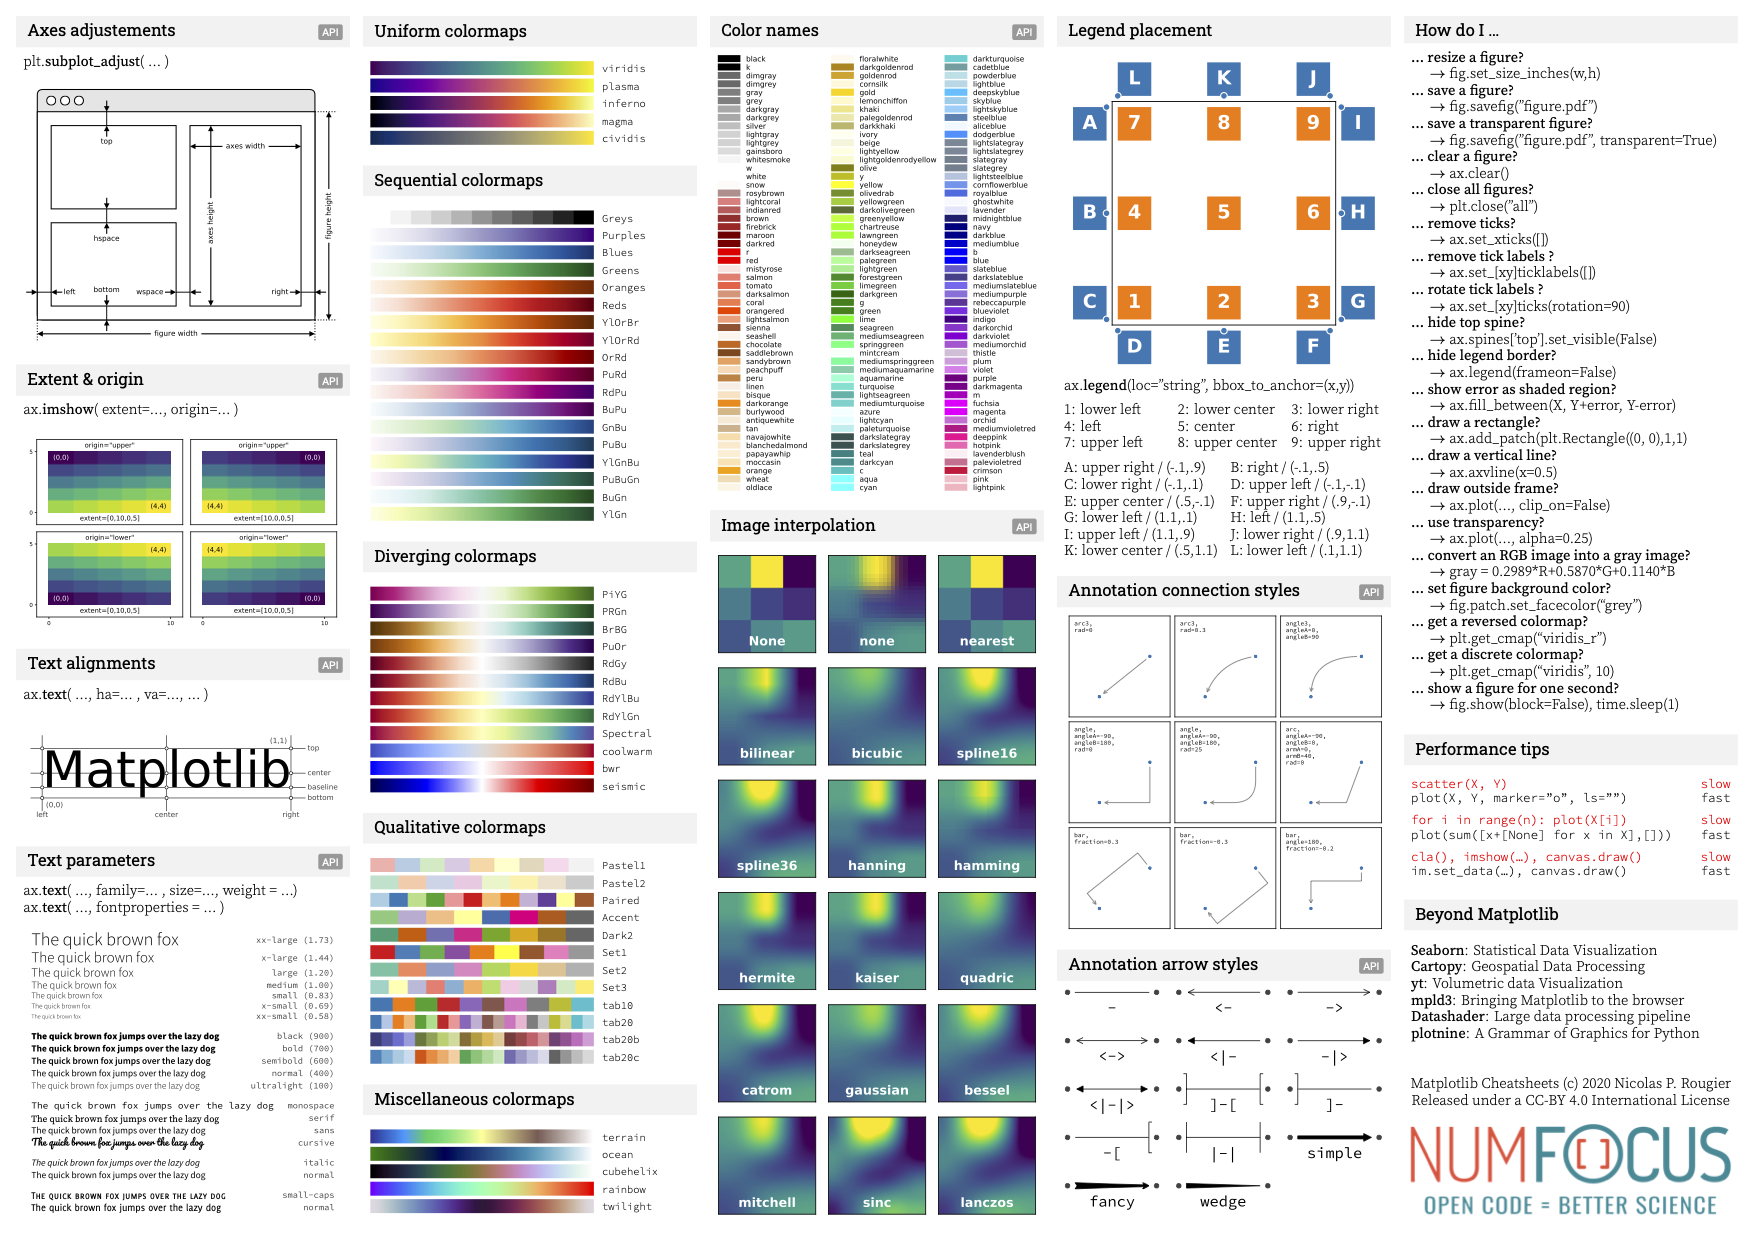

In [9]:
Image('https://raw.githubusercontent.com/matplotlib/cheatsheets/master/cheatsheets-2.png')

## Dataset

Throughout these notebooks we will use various open datasets, mostly comming from the R world which provides a collection of interesting datasets for teaching purposes.

Our first dataset describes diamonds. The dataset includes both *numerical* data such as the price and *categorical* data such as the the color.

In [10]:
diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv')

In [11]:
diams.head(5)

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


## The figure and axis

We have seen in the "minimal plotting" notebook that the first step of any plotting is to create 1) a figure that will contain all the plot parts and 2) one or more axis objects that will contains specific parts of the figure e.g. if we want to create a grid of plots. There are multiple ways of creating these objects, but here we just use the ```subplots``` (**don't forget the final s**) function:

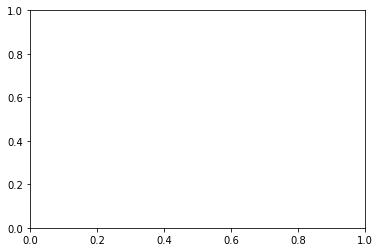

In [6]:
fig, ax = plt.subplots()

## Size and grid

We will use only thre parameters of the ```subplots``` function: to set its size ```figsize```:

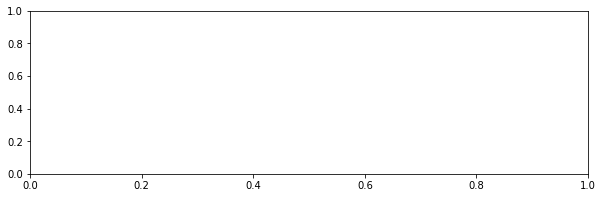

In [12]:
fig, ax = plt.subplots(figsize=(10,3))

and to get a grid of plots with ```nrows``` rows and ```ncols``` columns instead of a single plot:

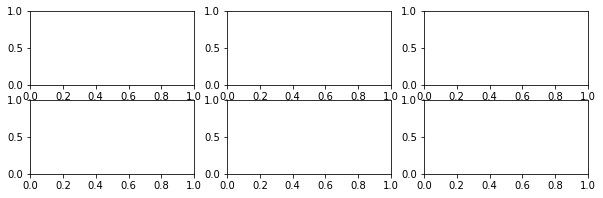

In [14]:
fig, ax = plt.subplots(figsize=(10,3), nrows=2, ncols=3)

Note that here the returned ```ax``` is not a simple axis object but an **array of axis** objects:

In [15]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1337c49250>,
      dtype=object)

## Adding data

It is very easy to add one or multiple plot to the same ```ax``` object by using plotting function like ```plot``` attached to the ```ax``` object. In case we are dealing with a grid of plots, we have to select the correct position e.g. ```ax[0,1]``` for the plot in the first line and second column of a 2d grid. If we deal with a single row of plots, ```ax[1]]``` is sufficient:

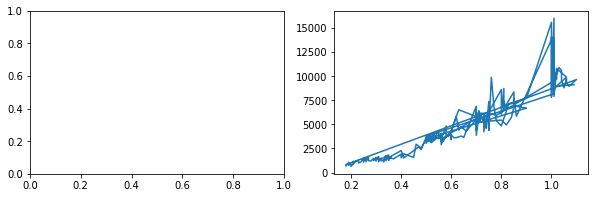

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
ax[1].plot(diams.carat, diams.price);

## Markers and lines

As you can see, Matplotlib uses default settings for plotting: no markers, blue line. Of course all these can be overriden. In particular here we need only markers and no line. For this we use the ```marker```  and ```linestyle``` option. You can find all options in the cheat sheet above or directly in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

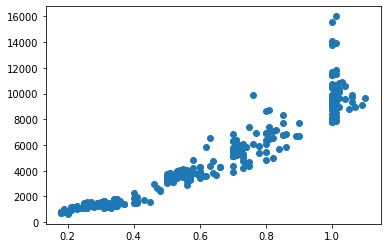

In [19]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, marker= 'o', linestyle='');

## Adding more data

Let's imagine that we fitted a curve to our data, here a simple parabola $f(x) = a*x^2 + b*x + c$:

In [20]:
import scipy.optimize
def parabola(x, a, b, c):
    return a * x**2 + b*x + c

fit_params, _ = scipy.optimize.curve_fit(parabola, diams.carat, diams.price)

Now we want to superpose this to our data. We use here a dotted line and no marker.

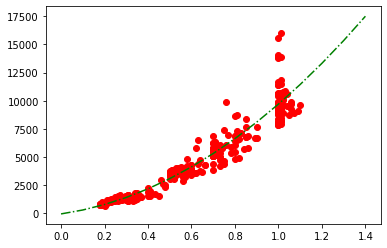

In [21]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, marker= 'o', color='red', linestyle='')
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');

## Short format

The formating can be specified in the shortned string ```fmt = '[marker][line][color]'``` which makes this changes much more succint:

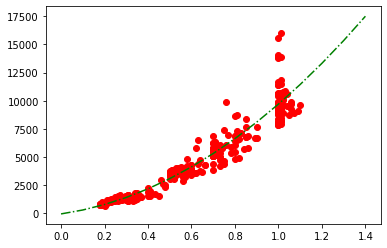

In [22]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'or')
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), '-.g');

## Transparency

Finally, we see that because of the density of points, we cannot really distinguish points. One way to improve this is to add transparency. This is done in almost all plots via the ```alpha``` option:

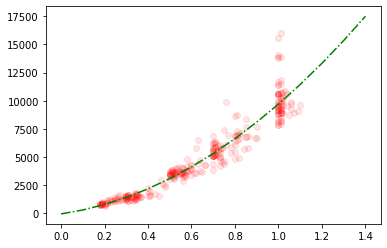

In [23]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'or', alpha=0.1)
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), '-.g');

## Automatic settings for multiple plots

If we don't specify any setthings and try to plot multiple datasets on the same plot, Matplotlib automatically handles the different settings for us. For example let's imagine that we want to plot the same dependency but for each color separately. We know how to extract the rows corresponding to a specific color: 

In [24]:
diams['colour'].unique()

array(['D', 'E', 'G', 'F', 'H', 'I'], dtype=object)

Let's do it for three colors: D, E and G. We see that since we want to have markers, we have to specify them manually:

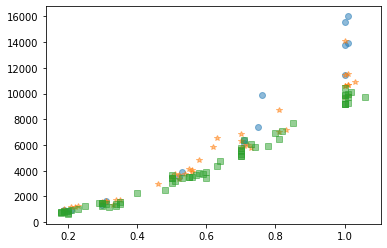

In [25]:
fig, ax = plt.subplots()
ax.plot(diams[diams['colour']=='D'].carat, diams[diams['colour']=='D'].price, 'o', alpha=.5);
ax.plot(diams[diams['colour']=='E'].carat, diams[diams['colour']=='E'].price,'*', alpha=.5);
ax.plot(diams[diams['colour']=='G'].carat, diams[diams['colour']=='G'].price,'s', alpha=.5);

## Scatter plot

Instead of the ```plot``` function you can also use the ```scatter``` function which is very similar. The main difference is tha ```sctter``` by default plots points instead of lines. It also has a few specifiy options like ```s``` to set the point size:

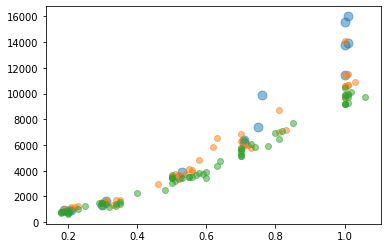

In [41]:
fig, ax = plt.subplots()
ax.scatter(diams[diams['colour']=='D'].carat, diams[diams['colour']=='D'].price, alpha=.5, s=80);
ax.scatter(diams[diams['colour']=='E'].carat, diams[diams['colour']=='E'].price, alpha=.5);
ax.scatter(diams[diams['colour']=='G'].carat, diams[diams['colour']=='G'].price, alpha=.5);

## Histograms

As you can see in the [cheat sheet](#cheatsheet), Matplotlib offers many different types of plots. They of course all have their specificities but all share the same principles for dealing with
- multiple superposed plots with ```ax``` re-usage
- formating options
- axis limits
- etc.

Let's see a few examples. For example we can create a histogram of diamond price as a function of color. We have here two options: we can directly use ```hist``` or first create a histogram and plot it with ```bar```:

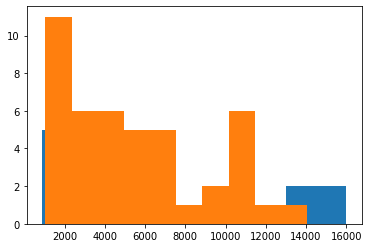

In [26]:
fig, ax = plt.subplots()
ax.hist(diams[diams['colour'] == 'D']['price'])
ax.hist(diams[diams['colour'] == 'E']['price']);

Here we have multiple things to improve:
1. We need to use the same bins for both colors. At the moment bins are optimized for each dataset which makes comparison impossible. 
2. We need transparency
3. We could make the bar's edge white to distinguish them

You can find all options [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Additionally, you can find all options for styling the bars (which are just squares or *Patches*) [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch).

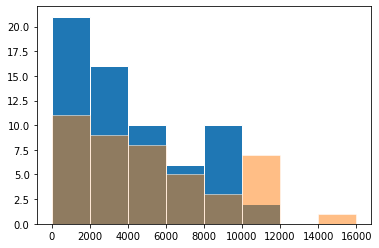

In [27]:
bins = np.arange(0,17000,2000)
fig, ax = plt.subplots()
ax.hist(diams[diams['colour'] == 'G']['price'], bins=bins, edgecolor='white')
ax.hist(diams[diams['colour'] == 'E']['price'], bins=bins,alpha=0.5, edgecolor='white');

Even more practical, you can create plots with stacked bars, if you directly use *multiple* datasets:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


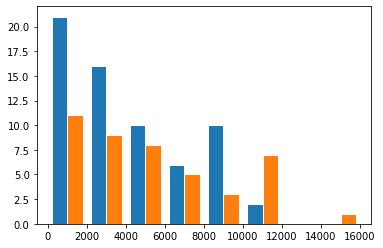

In [28]:
bins = np.arange(0,17000,2000)
fig, ax = plt.subplots()
ax.hist([diams[diams['colour'] == 'G']['price'], diams[diams['colour'] == 'E']['price']], bins=bins, edgecolor='white');

## Exercise
1. Import the penguins data: https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv
2. Try to reproduce the following plot: on the lect scatter plot of the ```body_mass_g``` as a function of ```bill_depth_mm``` and on the right histogram of the ```body_mass_g```.


![](https://github.com/guiwitz/ISDAwPython_day2/raw/master/plots/ex_11_1.png)

3. Try to reproduce the second graph where each species is represented separately. Remember that you can get all species with ```unique_species = penguins['species'].unique()``` and can then use a for loop over that list.

![](https://github.com/guiwitz/ISDAwPython_day2/raw/master/plots/ex_11_2.png)